In [1]:
%cd ..

/home/ubuntu/OptiServe


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools

from src.modeling.application_performance_modeling import ApplicationPerformanceModeling

In [3]:
mem_config_list = {
    'f1': 512, 'f2': 1024, 'f3': 2048, 'f4': 4096,
    'f5': 128, 'f6': 256
}
function_duration_dict = {
    'f1': 100, 'f2': 500, 'f3': 1000, 'f4': 210,
    'f5': 130, 'f6': 100
}

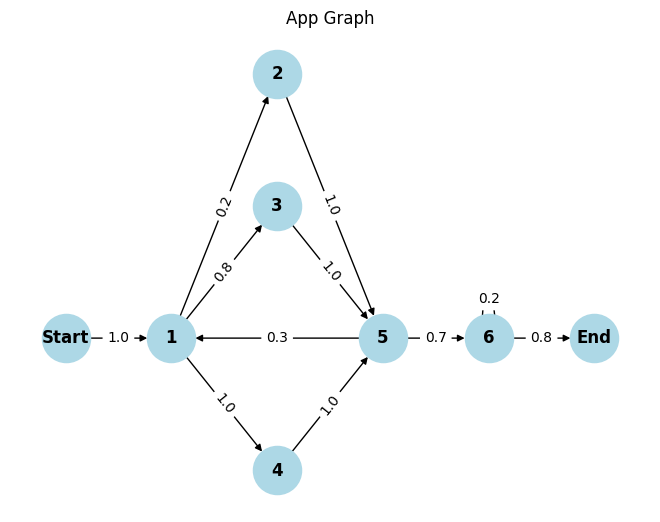

In [ ]:
App_G = nx.DiGraph()

App_G.add_node('Start', pos=(0, 0))
App_G.add_node(1, pos=(1, 0), mem=mem_config_list['f1'], rt=function_duration_dict['f1'])
App_G.add_node(2, pos=(2, 1), mem=mem_config_list['f2'], rt=function_duration_dict['f2'])
App_G.add_node(3, pos=(2, 0.5), mem=mem_config_list['f3'], rt=function_duration_dict['f3'])
App_G.add_node(4, pos=(2, -0.5), mem=mem_config_list['f4'], rt=function_duration_dict['f4'])
App_G.add_node(5, pos=(3, 0), mem=mem_config_list['f5'], rt=function_duration_dict['f5'])
App_G.add_node(6, pos=(4, 0), mem=mem_config_list['f6'], rt=function_duration_dict['f6'])
App_G.add_node('End', pos=(5, 0))

App_G.add_weighted_edges_from([
    ('Start', 1, 1.0),
    (1, 2, 0.2),
    (1, 3, 0.8),
    (1, 4, 1.0),
    (2, 5, 1.0),
    (3, 5, 1.0),
    (4, 5, 1.0),
    (5, 6, 0.7),
    (6, 6, 0.2),  # self-loop
    (6, 'End', 0.8),
    (5, 1, 0.3)   # backward edge
])

pos = nx.get_node_attributes(App_G, 'pos')
nx.draw(App_G, pos, with_labels=True, node_size=1200, node_color='lightblue', font_weight='bold', arrows=True)

labels = nx.get_edge_attributes(App_G, 'weight')
nx.draw_networkx_edge_labels(App_G, pos, edge_labels=labels)

pos_label_offset = {k: (v[0], v[1] + 0.15) for k, v in pos.items()}

plt.title("App Graph")
plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
app = ApplicationPerformanceModeling(App_G, delay_type='None')
app.update_ne()
print('Relative number of exectutions reported by modeling:', app.ne)

Relative number of exectutions reported by modeling: {'Start': 0, 1: 1.4285714285714286, 2: 0.28571428571428575, 3: 1.142857142857143, 4: 1.4285714285714286, 5: 1.4285714285714286, 6: 1.25, 'End': 0}


In [9]:
cost = app.get_avg_cost()
app.get_simple_dag()
rt = app.get_avg_rt()

print('Cost:', cost)
print('Response Time:', rt)

Cost: 63.967387053571436
Response Time: 1739.2857142857144
